In [220]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


In [221]:
stock_prices = pd.read_csv('TSLA.csv')
stock_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-07-19,225.000000,229.100006,224.750000,225.259995,225.259995,3115100
1,2016-07-20,226.470001,229.800003,225.000000,228.360001,228.360001,2568500
2,2016-07-21,226.000000,227.850006,219.100006,220.500000,220.500000,4428700
3,2016-07-22,221.990005,224.500000,218.880005,222.270004,222.270004,2579700
4,2016-07-25,222.270004,231.389999,221.369995,230.009995,230.009995,4490700


In [222]:
# Change stock_prices 'Date' column into datetime and set as index

stock_prices.set_index(pd.to_datetime(stock_prices.Date), inplace = True)
stock_prices = stock_prices.drop(columns = ['Date'])
stock_prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-19,225.000000,229.100006,224.750000,225.259995,225.259995,3115100
2016-07-20,226.470001,229.800003,225.000000,228.360001,228.360001,2568500
2016-07-21,226.000000,227.850006,219.100006,220.500000,220.500000,4428700
2016-07-22,221.990005,224.500000,218.880005,222.270004,222.270004,2579700
2016-07-25,222.270004,231.389999,221.369995,230.009995,230.009995,4490700


In [223]:
# Create features

stock_prices['daily_return'] = stock_prices.Close - stock_prices.Open
stock_prices['daily_open_change'] = stock_prices.Open.pct_change()*100
stock_prices.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,daily_open_change
Date,,,,,,,,
2016-07-19,225.000000,229.100006,224.750000,225.259995,225.259995,3115100,0.259995,NaN
2016-07-20,226.470001,229.800003,225.000000,228.360001,228.360001,2568500,1.890000,0.653334
2016-07-21,226.000000,227.850006,219.100006,220.500000,220.500000,4428700,-5.500000,-0.207533
2016-07-22,221.990005,224.500000,218.880005,222.270004,222.270004,2579700,0.279999,-1.774334
2016-07-25,222.270004,231.389999,221.369995,230.009995,230.009995,4490700,7.739991,0.126131


In [224]:
# Select stock data from 2018 on 

stock_prices = stock_prices['2018':]
stock_prices.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,daily_open_change
Date,,,,,,,,
2018-01-02,312.000000,322.109985,311.000000,320.529999,320.529999,4352200,8.529999,-1.322030
2018-01-03,321.000000,325.250000,315.549988,317.250000,317.250000,4521500,-3.750000,2.884615
2018-01-04,312.869995,318.549988,305.679993,314.619995,314.619995,9946300,1.750000,-2.532712
2018-01-05,316.619995,317.239990,312.000000,316.579987,316.579987,4591200,-0.040008,1.198581
2018-01-08,316.000000,337.019989,315.500000,336.410004,336.410004,9859400,20.410004,-0.195817


In [225]:
stock_prices.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
daily_return         0
daily_open_change    0
dtype: int64

In [226]:
stock_prices.shape

(388, 8)

In [227]:
#stock_prices['sig_change'] = 0
stock_prices.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,daily_open_change
Date,,,,,,,,
2018-01-02,312.000000,322.109985,311.000000,320.529999,320.529999,4352200,8.529999,-1.322030
2018-01-03,321.000000,325.250000,315.549988,317.250000,317.250000,4521500,-3.750000,2.884615
2018-01-04,312.869995,318.549988,305.679993,314.619995,314.619995,9946300,1.750000,-2.532712
2018-01-05,316.619995,317.239990,312.000000,316.579987,316.579987,4591200,-0.040008,1.198581
2018-01-08,316.000000,337.019989,315.500000,336.410004,336.410004,9859400,20.410004,-0.195817


In [228]:
stock_prices['sig_change'] = stock_prices.daily_open_change.map(lambda x: 1 if (x >= 2) else 0) 
stock_prices.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,daily_open_change,sig_change
Date,,,,,,,,,
2018-01-02,312.000000,322.109985,311.000000,320.529999,320.529999,4352200,8.529999,-1.322030,0
2018-01-03,321.000000,325.250000,315.549988,317.250000,317.250000,4521500,-3.750000,2.884615,1
2018-01-04,312.869995,318.549988,305.679993,314.619995,314.619995,9946300,1.750000,-2.532712,0
2018-01-05,316.619995,317.239990,312.000000,316.579987,316.579987,4591200,-0.040008,1.198581,0
2018-01-08,316.000000,337.019989,315.500000,336.410004,336.410004,9859400,20.410004,-0.195817,0


In [259]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.statespace.varmax import VARMAX
from math import sqrt
from sklearn.metrics import mean_squared_error

In [260]:
# Import and preview daily twitter senitment data 

daily_sentiment = pd.read_csv('daily_sentiment_all.csv')
daily_sentiment.head(7)

,date_time,sentiment_1,sentiment_2,s1_removed,s2_removed,s1_scaled,s2_scaled
0,2018-01-01,0.180875,0.165297,0.495927,0.463653,0.659138,0.742611
1,2018-01-02,0.140237,0.077410,0.454316,0.417621,0.526679,0.347230
2,2018-01-03,-0.103980,0.021639,-0.250139,0.005108,-0.269336,0.096328
3,2018-01-04,-0.047853,0.026405,0.120880,0.166267,-0.086394,0.117769
4,2018-01-05,0.039272,0.074772,0.223903,0.317157,0.197589,0.335358
5,2018-01-06,0.211614,0.095262,0.646823,0.618201,0.759330,0.427541
6,2018-01-07,0.138951,0.099850,0.513438,0.626923,0.522488,0.448178


In [261]:
# Import and preview Tesla daily stock data

stock_prices = pd.read_csv('TSLA.csv')
stock_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-07-19,225.000000,229.100006,224.750000,225.259995,225.259995,3115100
1,2016-07-20,226.470001,229.800003,225.000000,228.360001,228.360001,2568500
2,2016-07-21,226.000000,227.850006,219.100006,220.500000,220.500000,4428700
3,2016-07-22,221.990005,224.500000,218.880005,222.270004,222.270004,2579700
4,2016-07-25,222.270004,231.389999,221.369995,230.009995,230.009995,4490700


In [262]:
# Check daily_sentiment datatypes

daily_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 7 columns):
date_time      560 non-null object
sentiment_1    560 non-null float64
sentiment_2    560 non-null float64
s1_removed     560 non-null float64
s2_removed     560 non-null float64
s1_scaled      560 non-null float64
s2_scaled      560 non-null float64
dtypes: float64(6), object(1)
memory usage: 30.7+ KB


In [263]:
# Change daily_sentiment 'date_time' column into datetime and set as index

daily_sentiment.set_index(pd.to_datetime(daily_sentiment.date_time), inplace = True)
daily_sentiment = daily_sentiment.drop(columns = ['date_time'])

daily_sentiment.head()

,sentiment_1,sentiment_2,s1_removed,s2_removed,s1_scaled,s2_scaled
date_time,,,,,,
2018-01-01,0.180875,0.165297,0.495927,0.463653,0.659138,0.742611
2018-01-02,0.140237,0.077410,0.454316,0.417621,0.526679,0.347230
2018-01-03,-0.103980,0.021639,-0.250139,0.005108,-0.269336,0.096328
2018-01-04,-0.047853,0.026405,0.120880,0.166267,-0.086394,0.117769
2018-01-05,0.039272,0.074772,0.223903,0.317157,0.197589,0.335358


In [264]:
daily_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 560 entries, 2018-01-01 to 2019-07-14
Data columns (total 6 columns):
sentiment_1    560 non-null float64
sentiment_2    560 non-null float64
s1_removed     560 non-null float64
s2_removed     560 non-null float64
s1_scaled      560 non-null float64
s2_scaled      560 non-null float64
dtypes: float64(6)
memory usage: 30.6 KB


In [265]:
# Check stock_prices datatypes

stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 7 columns):
Date         755 non-null object
Open         755 non-null float64
High         755 non-null float64
Low          755 non-null float64
Close        755 non-null float64
Adj Close    755 non-null float64
Volume       755 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 41.4+ KB


In [266]:
# Change stock_prices 'Date' column into datetime and set as index

stock_prices.set_index(pd.to_datetime(stock_prices.Date), inplace = True)
stock_prices = stock_prices.drop(columns = ['Date'])
stock_prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-19,225.000000,229.100006,224.750000,225.259995,225.259995,3115100
2016-07-20,226.470001,229.800003,225.000000,228.360001,228.360001,2568500
2016-07-21,226.000000,227.850006,219.100006,220.500000,220.500000,4428700
2016-07-22,221.990005,224.500000,218.880005,222.270004,222.270004,2579700
2016-07-25,222.270004,231.389999,221.369995,230.009995,230.009995,4490700


In [267]:
# Upsample so you have columns for everyday

#stock_prices = stock_prices.resample('D').asfreq()
#stock_prices.head()

In [268]:
# Back fill nans
#stock_prices = stock_prices.bfill()

In [269]:
# Create column to view the percent change in open prices

stock_prices['daily_open_change'] = stock_prices.Open.pct_change() * 100
stock_prices.head()

,Open,High,Low,Close,Adj Close,Volume,daily_open_change
Date,,,,,,,
2016-07-19,225.000000,229.100006,224.750000,225.259995,225.259995,3115100,NaN
2016-07-20,226.470001,229.800003,225.000000,228.360001,228.360001,2568500,0.653334
2016-07-21,226.000000,227.850006,219.100006,220.500000,220.500000,4428700,-0.207533
2016-07-22,221.990005,224.500000,218.880005,222.270004,222.270004,2579700,-1.774334
2016-07-25,222.270004,231.389999,221.369995,230.009995,230.009995,4490700,0.126131


In [270]:
# Merge both dataframe

daily = pd.merge(stock_prices, daily_sentiment, how='inner', left_index=True, right_index=True)
daily.head()

,Open,High,Low,Close,Adj Close,Volume,daily_open_change,sentiment_1,sentiment_2,s1_removed,s2_removed,s1_scaled,s2_scaled
2018-01-02,312.000000,322.109985,311.000000,320.529999,320.529999,4352200,-1.322030,0.140237,0.077410,0.454316,0.417621,0.526679,0.347230
2018-01-03,321.000000,325.250000,315.549988,317.250000,317.250000,4521500,2.884615,-0.103980,0.021639,-0.250139,0.005108,-0.269336,0.096328
2018-01-04,312.869995,318.549988,305.679993,314.619995,314.619995,9946300,-2.532712,-0.047853,0.026405,0.120880,0.166267,-0.086394,0.117769
2018-01-05,316.619995,317.239990,312.000000,316.579987,316.579987,4591200,1.198581,0.039272,0.074772,0.223903,0.317157,0.197589,0.335358
2018-01-08,316.000000,337.019989,315.500000,336.410004,336.410004,9859400,-0.195817,0.066050,0.035224,0.200768,0.189111,0.284868,0.157444


In [271]:
# Drop unnecessary columns but keep open price

daily = daily.drop(columns = ['Open','High', 'Low', 'Close', 'Adj Close', 'Volume'])
daily.head()

,daily_open_change,sentiment_1,sentiment_2,s1_removed,s2_removed,s1_scaled,s2_scaled
2018-01-02,-1.322030,0.140237,0.077410,0.454316,0.417621,0.526679,0.347230
2018-01-03,2.884615,-0.103980,0.021639,-0.250139,0.005108,-0.269336,0.096328
2018-01-04,-2.532712,-0.047853,0.026405,0.120880,0.166267,-0.086394,0.117769
2018-01-05,1.198581,0.039272,0.074772,0.223903,0.317157,0.197589,0.335358
2018-01-08,-0.195817,0.066050,0.035224,0.200768,0.189111,0.284868,0.157444


In [272]:
# Check for null
daily.isnull().sum()

daily_open_change    0
sentiment_1          0
sentiment_2          0
s1_removed           0
s2_removed           0
s1_scaled            0
s2_scaled            0
dtype: int64

In [257]:
daily['pos_neg'] = daily.daily_open_change.map(lambda x: 1 if (x > 0) else (-1 if x < 0 else 0)) 
daily.head()

,daily_open_change,sentiment_1,sentiment_2,s1_removed,s2_removed,s1_scaled,s2_scaled,sig_change,pos_neg
2018-01-02,-1.322030,0.140237,0.077410,0.454316,0.417621,0.526679,0.347230,-1,-1
2018-01-03,2.884615,-0.103980,0.021639,-0.250139,0.005108,-0.269336,0.096328,1,1
2018-01-04,-2.532712,-0.047853,0.026405,0.120880,0.166267,-0.086394,0.117769,-1,-1
2018-01-05,1.198581,0.039272,0.074772,0.223903,0.317157,0.197589,0.335358,1,1
2018-01-08,-0.195817,0.066050,0.035224,0.200768,0.189111,0.284868,0.157444,-1,-1


# ARIMAX

### Model with sentiment_1

In [258]:
daily1 = daily.drop(columns = ['daily_open_change','sentiment_2', 's1_removed', 's2_removed', 's1_scaled', 's2_scaled'])
daily1.head()

,sentiment_1,sig_change,pos_neg
2018-01-02,0.140237,-1,-1
2018-01-03,-0.103980,1,1
2018-01-04,-0.047853,-1,-1
2018-01-05,0.039272,1,1
2018-01-08,0.066050,-1,-1


In [250]:
train_start,train_end = '2018-01-02','2019-02-25'
test_start,test_end = '2019-02-26','2019-07-12'
train = daily1['sig_change'][train_start:train_end].dropna()
test = daily1['sig_change'][test_start:test_end].dropna()
exog_train = daily1.drop(['sig_change'],axis = 1)[train_start:train_end].dropna()
exog_test = daily1.drop(['sig_change'],axis = 1)[test_start:test_end].dropna()

In [251]:
arimax1 = sm.tsa.statespace.SARIMAX(train, order=[1,0,0], seasonal_order=(0,0,0,0), exog=exog_train).fit()
arimax1.summary()

/Users/erikadauria/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:             sig_change   No. Observations:                  288
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -407.079
Date:                Tue, 30 Jul 2019   AIC                            820.158
Time:                        17:46:30   BIC                            831.147
Sample:                             0   HQIC                           824.561
                                - 288                                         
Covariance Type:                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
sentiment_1     0.7142      1.208      0.591      0.554      -1.654       3.082
ar.L1           0.0004      0.059      0.007      0.994      -0.115       0.116
sigma2          0.9891      1.390      0.711      0.477      -1.736       3.714
===================================================================================
Ljung-Box (Q):                       28.51   Jarque-Bera (JB):                47.28
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.06
Prob(H) (two-sided):                  0.98   Kurtosis:                         1.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [252]:
pred1 = arimax1.predict(start=288, end=383, exog = exog_test)
print('ARIMAX model MSE:{}'.format(mean_squared_error(test,pred1)))

ARIMAX model MSE:0.986456162686931


/Users/erikadauria/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [253]:
pred1[:5]

288   -0.091213
289    0.043802
290    0.053003
291    0.044789
292    0.002843
dtype: float64

In [254]:
predictions1 = pd.DataFrame(pred1, columns= ['predictions'])
predictions1.set_index(exog_test.index, inplace=True)
predictions1 = pd.merge(pd.DataFrame(test), predictions1, how='inner', left_index=True, right_index=True)

predictions1.head()

,sig_change,predictions
2019-02-26,-1,-0.091213
2019-02-27,1,0.043802
2019-02-28,1,0.053003
2019-03-01,-1,0.044789
2019-03-04,-1,0.002843


In [255]:
predictions1.isna().sum()

sig_change     0
predictions    0
dtype: int64

In [256]:
predictions1['binary_pred'] = predictions1.predictions.apply(lambda x: 1 if x >= 0.055 else(1 if x <= -0.055 else 0))

In [219]:
predictions1.head(10)

,sig_change,predictions,binary_pred
2019-02-26,-1,-0.091213,1
2019-02-27,1,0.043802,0
2019-02-28,1,0.053003,0
2019-03-01,-1,0.044789,0
2019-03-04,-1,0.002843,0
2019-03-05,-1,0.001175,0
2019-03-06,-1,0.011100,0
2019-03-07,1,0.012369,0
2019-03-08,-1,0.050601,0
2019-03-11,1,0.050551,0


In [209]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
accuracy=accuracy_score(predictions1.sig_change,predictions1.binary_pred)
precision=precision_score(predictions1.sig_change,predictions1.binary_pred)
cf=confusion_matrix(predictions1.sig_change, predictions1.binary_pred)
print(accuracy)
print(precision)
print(cf)

0.5104166666666666
0.5294117647058824
[[13 32]
 [15 36]]


In [89]:
# Create features

stock_prices['daily_return'] = stock_prices.Close - stock_prices.Open
stock_prices['daily_open_change'] = stock_prices.Open.pct_change()*100
stock_prices.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,daily_open_change
Date,,,,,,,,
2016-07-19,225.000000,229.100006,224.750000,225.259995,225.259995,3115100,0.259995,NaN
2016-07-20,226.470001,229.800003,225.000000,228.360001,228.360001,2568500,1.890000,0.653334
2016-07-21,226.000000,227.850006,219.100006,220.500000,220.500000,4428700,-5.500000,-0.207533
2016-07-22,221.990005,224.500000,218.880005,222.270004,222.270004,2579700,0.279999,-1.774334
2016-07-25,222.270004,231.389999,221.369995,230.009995,230.009995,4490700,7.739991,0.126131


In [90]:
# Select stock data from 2018 on 

stock_prices = stock_prices['2018':]
stock_prices.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,daily_open_change
Date,,,,,,,,
2018-01-02,312.000000,322.109985,311.000000,320.529999,320.529999,4352200,8.529999,-1.322030
2018-01-03,321.000000,325.250000,315.549988,317.250000,317.250000,4521500,-3.750000,2.884615
2018-01-04,312.869995,318.549988,305.679993,314.619995,314.619995,9946300,1.750000,-2.532712
2018-01-05,316.619995,317.239990,312.000000,316.579987,316.579987,4591200,-0.040008,1.198581
2018-01-08,316.000000,337.019989,315.500000,336.410004,336.410004,9859400,20.410004,-0.195817


In [ ]:
st

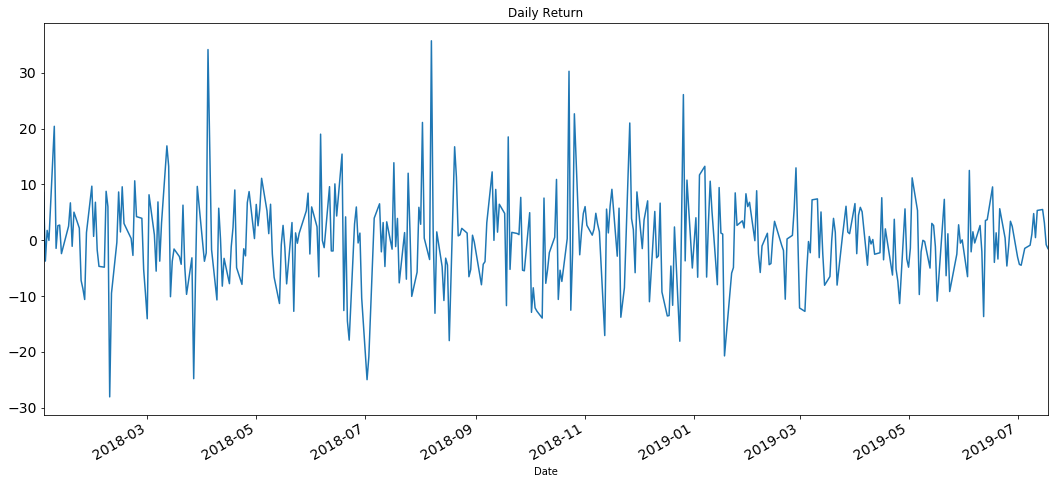

In [18]:
stock_prices.daily_return.plot(figsize=(18,8), title= 'Daily Return', fontsize=14)

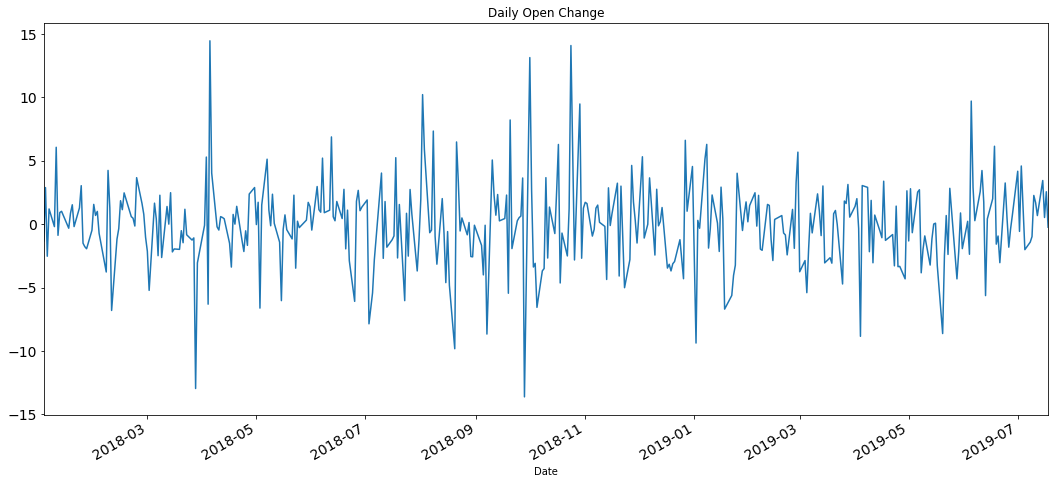

In [19]:
stock_prices.daily_open_change.plot(figsize=(18,8), title= 'Daily Open Change', fontsize=14)

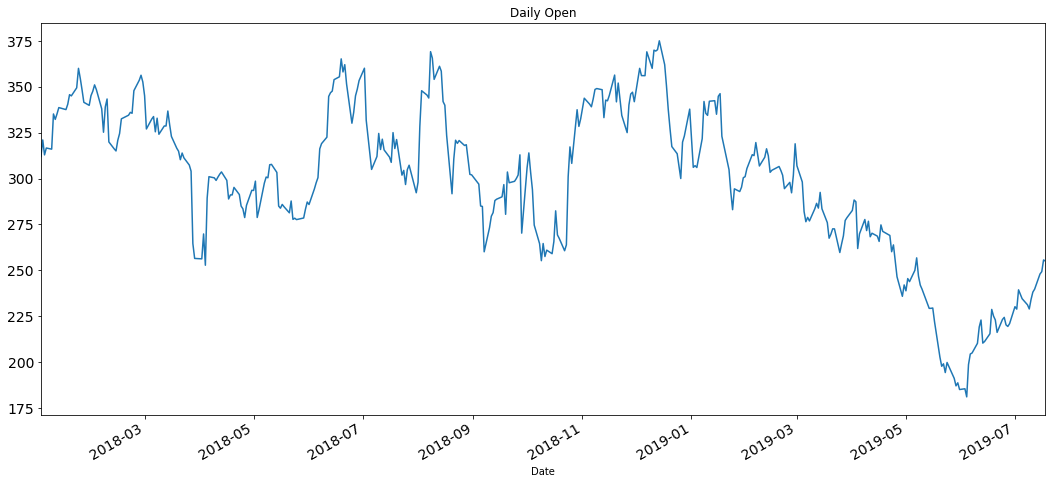

In [27]:
stock_prices.Open.plot(figsize=(18,8), title= 'Daily Open', fontsize=14)

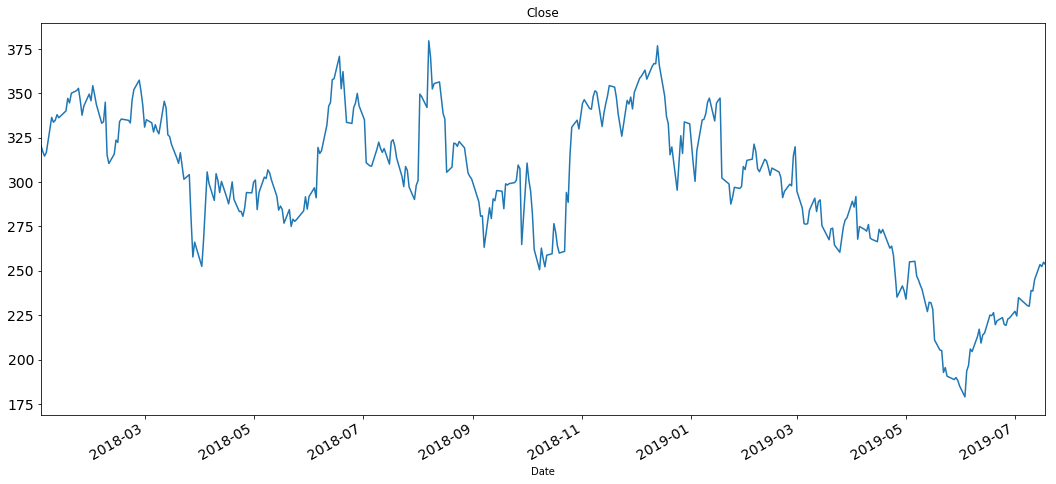

In [28]:
stock_prices.Close.plot(figsize=(18,8), title= 'Close', fontsize=14)

In [ ]:
stock_prices.sig_change.plot(figsize=(18,8), title= '', fontsize=14)

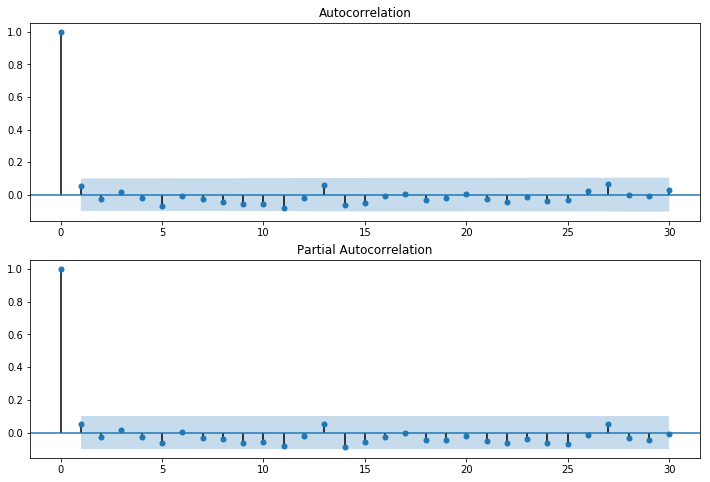

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(stock_prices.daily_return.iloc[1:], lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(stock_prices.daily_return.iloc[1:], lags=30, ax=ax2)

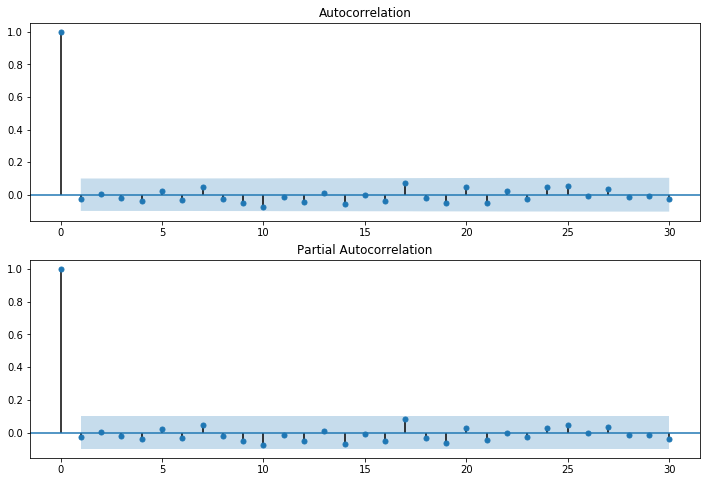

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(stock_prices.daily_open_change.iloc[1:], lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(stock_prices.daily_open_change.iloc[1:], lags=30, ax=ax2)

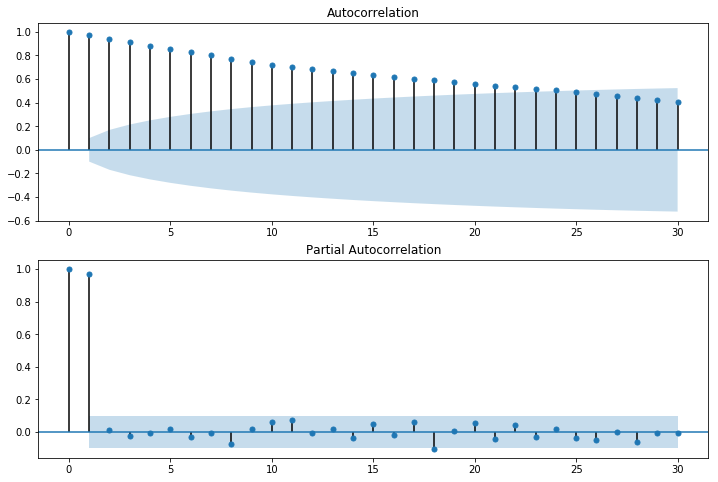

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(stock_prices.Open.iloc[1:], lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(stock_prices.Open.iloc[1:], lags=30, ax=ax2)

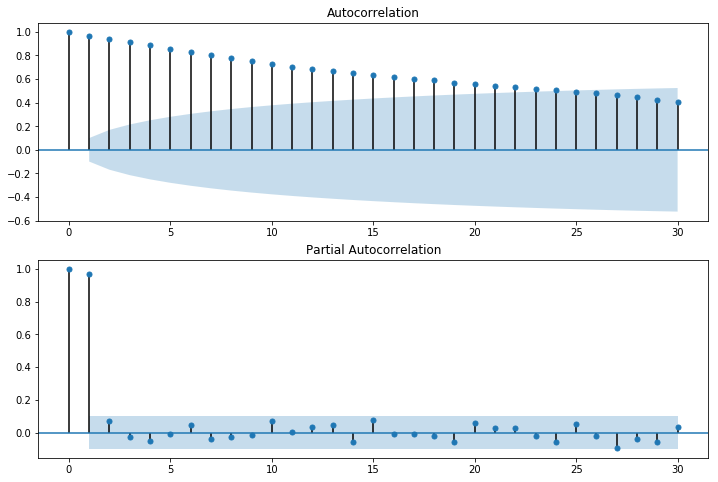

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(stock_prices.Close.iloc[1:], lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(stock_prices.Close.iloc[1:], lags=30, ax=ax2)

<Figure size 432x288 with 0 Axes>

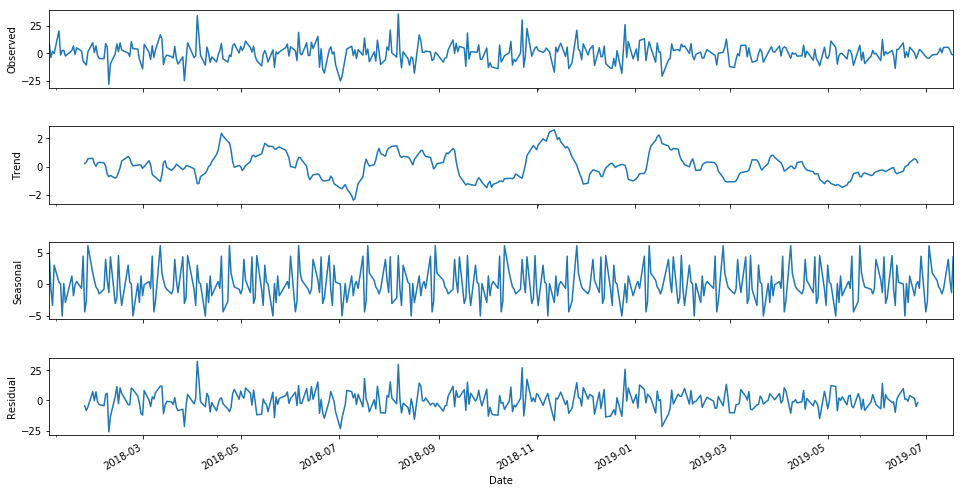

In [32]:
decomposition = seasonal_decompose(stock_prices.daily_return, freq=30)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

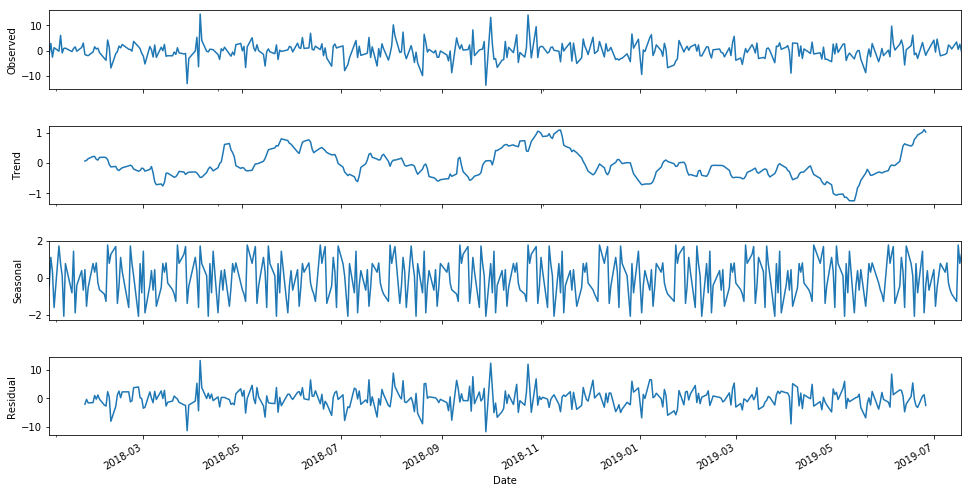

In [33]:
decomposition = seasonal_decompose(stock_prices.daily_open_change, freq=30)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

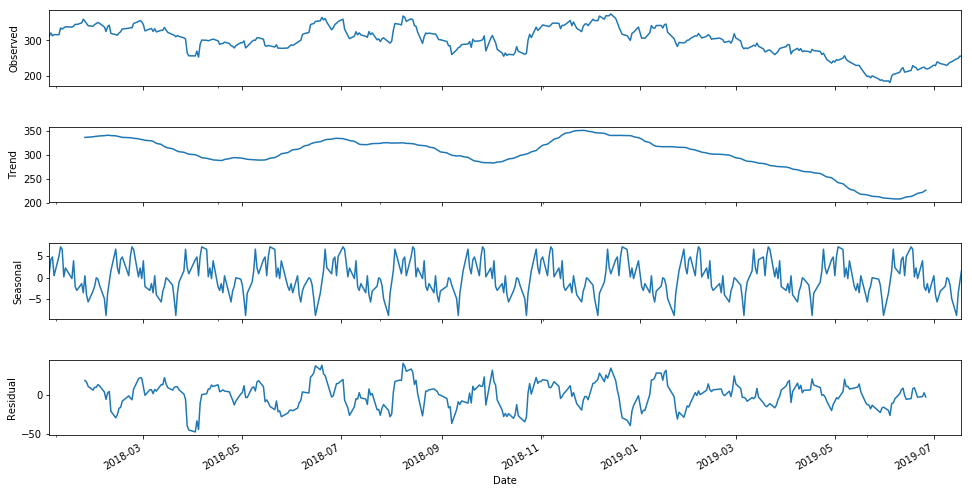

In [34]:
decomposition = seasonal_decompose(stock_prices.Open, freq=30)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

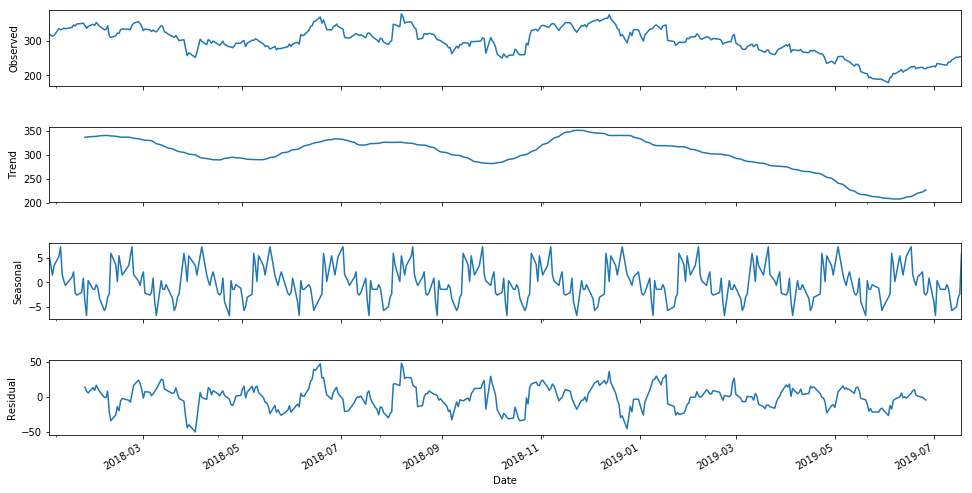

In [35]:
decomposition = seasonal_decompose(stock_prices.Close, freq=30)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)